# Assignment 6b
Face Recognition using **LDA**   
Submitted by: **IEC2016012**

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
# For resizing image
from PIL import Image
import glob

## Resizing images

In [2]:
# size = 128, 128
# for i in range(10):
#     for infile in glob.glob("dataset/train/"+str(i)+"/*.jpg"):
# #         print(infile)
#         file, ext = os.path.splitext(infile)
#         im = Image.open(infile)
#         im.thumbnail(size)
#         im.save(file + "_small.jpg", "JPEG")

# for i in range(10):
#     for infile in glob.glob("dataset/test/*.jpg"):
# #         print(infile)
#         file, ext = os.path.splitext(infile)
#         im = Image.open(infile)
#         im.thumbnail(size)
#         im.save(file + "_small.jpg", "JPEG")

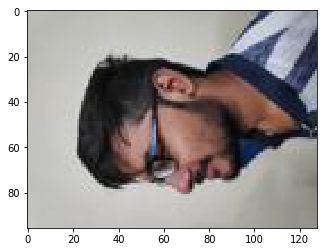

(96, 128, 3)


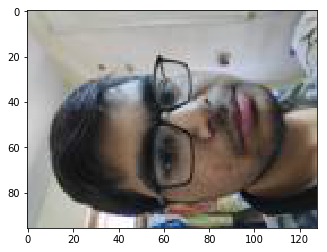

(96, 128, 3)


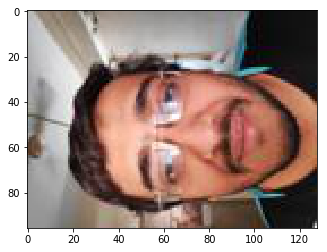

(96, 128, 3)


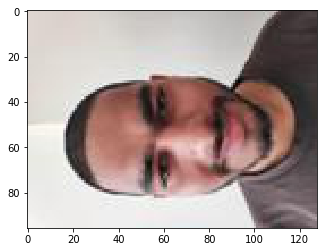

(96, 128, 3)


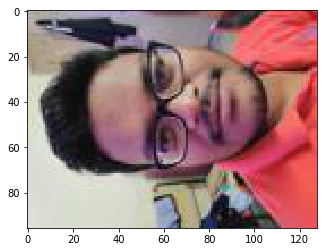

(96, 128, 3)


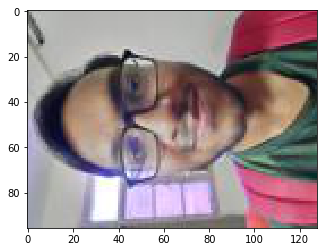

(96, 128, 3)


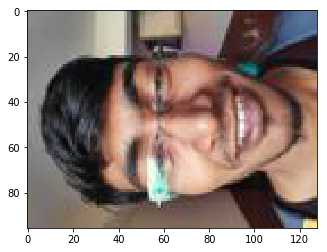

(96, 128, 3)


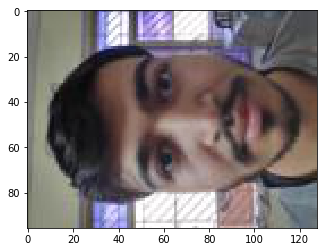

(96, 128, 3)


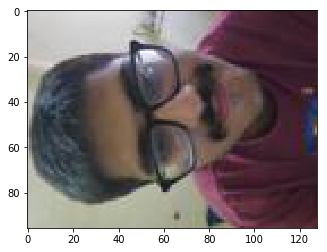

(96, 128, 3)


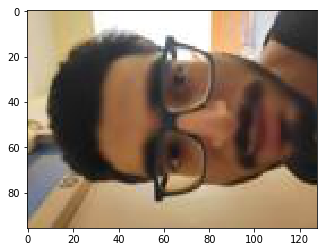

(96, 128, 3)


In [3]:
path = "dataset/train/"
dataset = []
# n = 10 #no of people
# m = 4 #no of images per person for training

for x in range(10):
    for j in range (1,5):
        filename = str(path + str(x) +'/' + str(j) + '_small.jpg')
        temp = plt.imread(filename)

        if(j==1):
            plt.imshow(temp)
            plt.show()

            print(temp.shape)
        
        im = temp.flatten()
        dataset.append(im)

In [4]:
X = np.asarray(dataset)
print(X.shape)

(40, 36864)


### Making dataset mean centered

In [5]:
# np.mean(X, axis=1)

In [6]:
# X = X - np.mean(X, axis=1)[:,np.newaxis]
# print(X)

In [7]:
mean = np.mean(X, axis = 0)
print(mean.shape)

for i in range (X.shape[1]):
    for j in range(X.shape[0]):
        X[j][i] = X[j][i] - mean[i]
print(X)

(36864,)
[[ 11  13  11 ...  22  45  43]
 [  3   8  11 ... 255  18  34]
 [  0  12   6 ... 143 183 185]
 ...
 [ 13 247 205 ...  58  57  19]
 [ 64  44  17 ...  59  51 251]
 [ 13   2 221 ... 160 180 181]]


In [8]:
# # tf = X
# X = tf
# print(tf)

In [9]:
cov_mat = X@X.T
print(cov_mat.shape)

(40, 40)


In [10]:
eigval, eigvec = np.linalg.eig(cov_mat)
print(eigval.shape, eigvec.shape)

(40,) (40, 40)


In [11]:
imp_eig_vec = eigvec[:,0:2]

eig_faces = imp_eig_vec.T@X
# print(eig_faces.shape)
weights = eig_faces@X.T
w = np.reshape(weights,80)

st_dev = np.std(w, axis=0)
var = st_dev*st_dev
var = np.reshape(var,[1,1])

print(var, st_dev)
print(weights.shape)
print(w.shape)

[[4.06724252e+18]] 2016740567.5738635
(2, 40)
(80,)


In [12]:
imp_eig_faces = weights
class_means = np.empty([10,4])  #5,2
print(imp_eig_faces.shape, class_means.shape)
all_mean = np.mean(imp_eig_faces, axis = 1)

(2, 40) (10, 4)


In [14]:
for j in range(10):
    for i in range(int(j*imp_eig_faces.shape[1]/10), int((j+1)*imp_eig_faces.shape[1]/10)):
        class_means[j][0] += imp_eig_faces[0][i]
        class_means[j][1] += imp_eig_faces[1][i]
    class_means[j][0] /=10
    class_means[j][1] /=10

*sw*: within class scatter matrix   
*sb*: between class scatter matrix

In [17]:
import copy
sw = copy.deepcopy(imp_eig_faces)
sb = copy.deepcopy(imp_eig_faces)

for i in range(sb.shape[1]):
    sb[0][i] -= all_mean[0]
    sb[1][i] -= all_mean[1]

for i in range(sw.shape[1]):
    a = int(i/11)
    sw[0][i] -= class_means[a][0]
    sw[1][i] -= class_means[a][1]

s_b = sb@sb.T
s_w = sw@sw.T

### Calculating eigen values and eigen vectors

In [18]:
eigval2, eigvec2 = np.linalg.eig(np.linalg.inv(s_w)@s_b)
print(eigval2.shape, eigvec2.shape)
imp_eig_vec2 = eigvec2[::,-1:]

(2,) (2, 2)


### Calculating fisher faces

In [19]:
fisher_faces = imp_eig_vec2.T@imp_eig_faces
print(fisher_faces.shape)

(1, 40)


In [20]:
w1 = np.reshape(fisher_faces,(40))
st_dev = np.std(w1, axis=0)
var = st_dev**2
var = np.reshape(var,[1,1])
print(w1.shape)
print(st_dev, var)

(40,)
47500182.26934938 [[2.25626732e+15]]


## Testing

In [21]:
# import scipy.spatial.distance as sp


# test_path = 'dataset/test/'
# labels = [0,1,2,3,4,5,6,7,8,9]
# total_images = 10
# correct = 0

# print(weights.shape)

# for k in range(10):
#     min_dist = 10**10
    
#     filename = test_path + str(k) + "_small.jpg"
#     test_im = plt.imread(filename)

#     y = test_im.flatten()
#     y = np.reshape(y,[36864,1])
# #     print(y.shape)

#     for i in range(36864):
#         y[i][0] = y[i][0] - mean[i]

# #     print(eig_faces.shape, y.shape)
#     _y = eig_faces@y
#     # Selecting important eigenvector
#     y1 = _y[0][0]
#     print(imp_eig_vec2.shape,y1)
#     test_face_final = np.matmul(np.transpose(imp_eig_vec2),y1)
#     test_face_final = test_face_final[0][0]
        
# #     for i in range (weights.shape[1]):
# #         dist = abs(weights[0][i] - test_face)
# #         if (dist < min_dist):
# #             min_dist = dist
# #             min_i = i
# # #         print(dist,min_i)
#     for i in range (fisher_faces.shape[1]):
# #         dist = abs(weights[0][i] - test_face)
#         dist = sp.mahalanobis(fisher_faces[0][i],test_face_final,np.linalg.inv(var))
#         if (dist < min_dist):
#             min_dist = dist
#             min_i = i
# #         print(dist,min_i)

#     if (labels[k] == min_i//10):
#         correct += 1

#     print ("Actual class: ", labels[k], ", Predicted class: ", min_i//10)

# print ("Accuracy = ", correct/total_images)

(2, 40)
(2, 1) -3783976012.963429


ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [26]:
import scipy.spatial.distance as sp

test_path = 'dataset/test/'
labels = [0,1,2,3,4,5,6,7,8,9]
total_images = 10
correct = 0

print(weights.shape)

for k in range(10):
    min_dist = 10**10

    filename = test_path + str(k) + "_small.jpg"
    test_im = plt.imread(filename)
    
    test = test_im.flatten()
    test_obj = np.reshape(test,[36864,1])

    for i in range (36864):
        test_obj[i][0] = test_obj[i][0] - mean[i]
    
    test_face = np.matmul(eig_faces,test_obj)
    test_face_final = np.matmul(np.transpose(imp_eig_vec2),test_face)
    test_face_final = test_face_final[0][0]

    for i in range (fisher_faces.shape[1]):
        # dist = abs(fisher_faces[0][i] - test_face_final)
        dist = sp.mahalanobis(fisher_faces[0][i],test_face_final,np.linalg.inv(var))

        if ( dist < min_dist ):
            min_dist = dist
            min_i = i
        # print(dist,i) 

    if ( labels[k-1] == min_i//10 ):
        correct = correct + 1

    print ("Actual class : " , labels[k-1], " Predicted class : ", min_i//10)

print ( correct, " correct predictions out of ", total_images, " images")
print ( "Accuracy = ", correct/total_images )

(2, 40)
Actual class :  9  Predicted class :  3
Actual class :  0  Predicted class :  2
Actual class :  1  Predicted class :  1
Actual class :  2  Predicted class :  2
Actual class :  3  Predicted class :  0
Actual class :  4  Predicted class :  3
Actual class :  5  Predicted class :  3
Actual class :  6  Predicted class :  3
Actual class :  7  Predicted class :  3
Actual class :  8  Predicted class :  2
2  correct predictions out of  10  images
Accuracy =  0.2


In [ ]:
# import scipy.spatial.distance as sp

# test_path = 'dataset/test/'
# labels = [0,1,2,3,4,5,6,7,8,9]
# total_images = 10
# correct = 0

# print(weights.shape)

# for k in range(10):
#     min_dist = 10**10

#     filename = test_path + str(k) + "_small.jpg"
#     y_im = plt.imread(filename)
    
#     y = y_im.flatten()
#     y_obj = np.reshape(y,[36864,1])

#     for i in range (36864):
#         y_obj[i][0] -= mean[i]
    
#     y_face = eig_faces@y_obj
#     y_face_final = imp_eig_vec2.T@y_face
#     y_face_final = y_face_final[0][0]

#     for i in range(fisher_faces.shape[1]):
#         dist = sp.mahalanobis(fisher_faces[0][i],y_face_final,np.linalg.inv(var))
#         if (dist < min_dist):
#             min_dist = dist
#             min_i = i

#     if (labels[k] == min_i//10):
#         correct = correct + 1
#     print ("Actual class: ", labels[k], ", Predicted class: ", min_i//10)

# print ("Accuracy = ", correct/total_images)

In [ ]:
# test_path = 'dataset/test/'
# labels = [0,1,2,3,4,5,6,7,8,9]
# total_images = 10
# correct = 0

# print(weights.shape)

# for k in range(10):
#     min_dist = 10**10
    
#     filename = test_path + str(k) + "_small.jpg"
#     test_im = plt.imread(filename)

#     y = test_im.flatten()
#     y = np.reshape(y,[36864,1])
# #     print(y.shape)

#     for i in range(36864):
#         y[i][0] = y[i][0] - mean[i]

# #     print(eig_faces.shape, y.shape)
#     test_face = eig_faces@y
#     # Selecting important eigenvector
#     test_face = test_face[0][0]

#     for i in range (weights.shape[1]):
#         dist = abs(weights[0][i] - test_face)
#         if (dist < min_dist):
#             min_dist = dist
#             min_i = i
#         print(dist,min_i)

#     if (labels[k] == min_i//10):
#         correct = correct + 1

#     print ("Actual class: ", labels[k], ", Predicted class: ", min_i//10)

# print ("Accuracy = ", correct/total_images)